# Airbnb NYC 2019 EDA

In [119]:
# Load dependencies

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

## Exploring the data attributes

In [120]:
# Loading the dataset

df_unclean = pd.read_csv("./AB_NYC_2019.csv")
print(" Samples: {} ; columns: {}".format(df_unclean.shape[0], df_unclean.shape[1]))



 Samples: 48895 ; columns: 16


In [121]:
#Listing the data attribute types

#df_unclean.dtypes
df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [122]:
# Viewing samples
df_unclean.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Comments

* Looks like some of the columns have Null values
* Let's remove listings that don't have a name or host name


In [123]:
#identifying the null values

df_unclean.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [124]:
# Drop rows when name or host_name is null

df_clean = df_unclean.dropna(subset=['name','host_name'])
df_clean.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [125]:
print(len(df_unclean))
print(len(df_clean))

48895
48858


## Creating a DF to create a SPLOM/Corr Matrix

In [127]:
#Let's drop the columns that are strings

df_quant = df_clean
for d in df_clean.columns:
    if df_clean.dtypes[d] == 'object':
        print(d)
        df_quant.drop(d, axis=1, inplace=True)

In [128]:
df_quant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   host_id                         48858 non-null  int64  
 2   latitude                        48858 non-null  float64
 3   longitude                       48858 non-null  float64
 4   price                           48858 non-null  int64  
 5   minimum_nights                  48858 non-null  int64  
 6   number_of_reviews               48858 non-null  int64  
 7   reviews_per_month               38821 non-null  float64
 8   calculated_host_listings_count  48858 non-null  int64  
 9   availability_365                48858 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 4.1 MB


In [129]:
df_quant.drop('id', axis=1, inplace=True)
df_quant.drop('host_id', axis=1, inplace=True)
df_quant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48858 non-null  float64
 1   longitude                       48858 non-null  float64
 2   price                           48858 non-null  int64  
 3   minimum_nights                  48858 non-null  int64  
 4   number_of_reviews               48858 non-null  int64  
 5   reviews_per_month               38821 non-null  float64
 6   calculated_host_listings_count  48858 non-null  int64  
 7   availability_365                48858 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.4 MB


## Correlation Matrix between the quantitative attributes

Text(0.5, 1.0, 'Correlation Matrix')

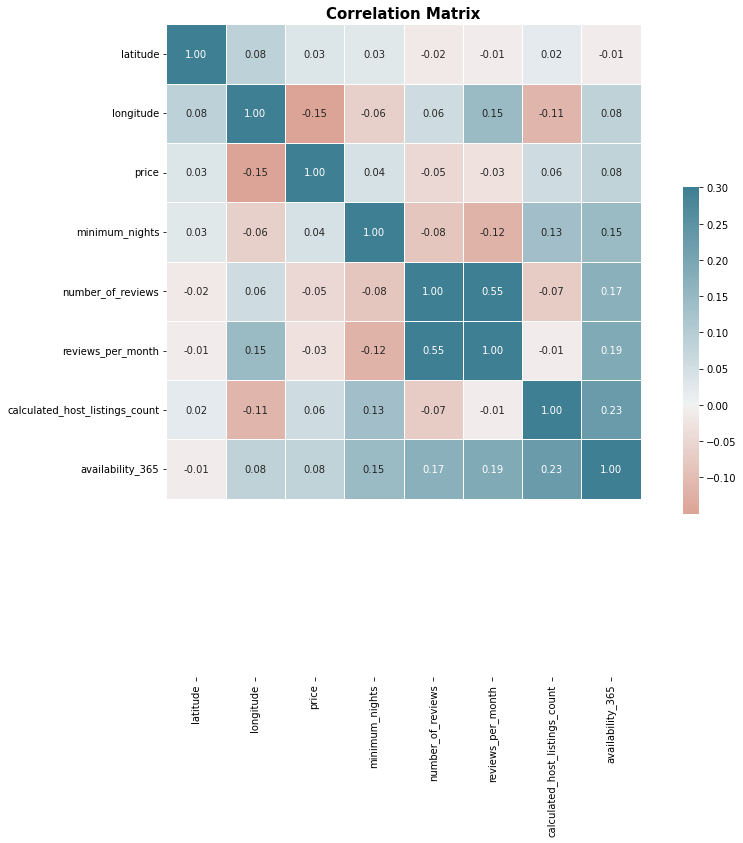

In [130]:
# Pearson's correlation

plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=df_quant.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

## Let's look at the residual plots to see if there are any linear trends between the attributes. If there is a trend in a few of the charts, I could possibly use this dataset for the experiment

In [141]:
df_quant_x, df_quant_y = df_quant.iloc[:,:-1], df_quant.iloc[:,-1]
print(df_quant_y)

0        365
1        355
2        365
3        194
4          0
        ... 
48890      9
48891     36
48892     27
48893      2
48894     23
Name: availability_365, Length: 48858, dtype: int64


ModuleNotFoundError: No module named 'statsmodels'

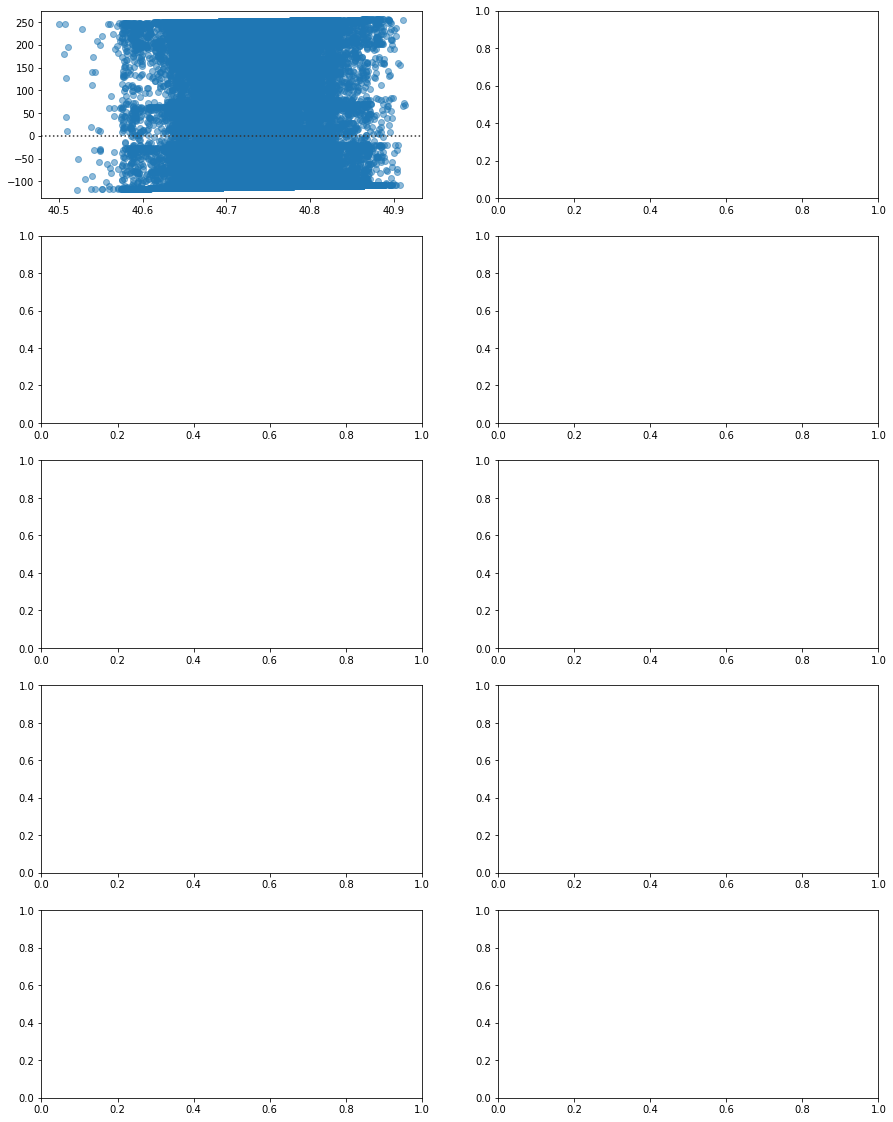

In [144]:
f, axes = plt.subplots(5, 2, figsize=(15, 20))
sns.residplot(df_quant_x.iloc[:,1],df_quant_y, lowess=True, ax=axes[0, 0], 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.setp(axes, yticks=[])
plt.tight_layout()